In [2]:
import pandas as pd

In [3]:
# xls to xlsx
import win32com.client as win32

In [57]:
year = 2018
month = 6
weeks = 1
# 2020년 1, 2, 3월까지 제주도 "깻잎"가격 소매가 조사
while month > 5 and month < 9:
    globals()['month_{}_{}'.format(month, year)] = []
    # 1개월치 매주 가격분포 조사
    try:
        while True:
            fname = "C:\\Users\\YSM\\Downloads\\{}년 {}월 {}주.xls".format(year, month, weeks)
            excel = win32.gencache.EnsureDispatch('Excel.Application')
            wb = excel.Workbooks.Open(fname)

            wb.SaveAs(fname+"x", FileFormat = 51) #FileFormat = 51 is for .xlsx extension
            wb.Close() #FileFormat = 56 is for .xls extension
            excel.Application.Quit()
            df = pd.read_excel('C:\\Users\\YSM\\Downloads\\{}년 {}월 {}주.xlsx'.format(year, month, weeks))
            weeks += 1


            price_list = []
            length = len(df.iloc[-1]) - 5
            for i in range(length):
                x = df.iloc[-1][2:-3][i].replace(',', '')
                price_list.append(int(x))
            avg = sum(price_list) / length
            globals()['month_{}_{}'.format(month, year)].append(round(avg, 2))  # 매주 평균값을 해당 월 리스트에 저장
    except:
        print("Month Over!")
        month += 1
        weeks = 1

Month Over!
Month Over!
Month Over!


In [53]:
print(month_6_2019, month_7_2019, month_8_2019)

[2721.8, 2177.0, 2177.0, 2177.0, 2177.0] [2177.0, 2177.0, 2177.0, 2266.2] [2720.0, 3200.0, 3200.0, 3200.0]


In [49]:
df_20 = pd.DataFrame([month_6_2020, month_7_2020, month_8_2020], index='June July August'.split(), columns='Week1 Week2 Week3 Week4 Week5'.split())
df_2020 = df_20.fillna(df.iloc[1])
df_2020 = df_2020.T
df_2020

,June,July,August
Week1,3300.0,3260.0,3200.0
Week2,3300.0,3200.0,3200.0
Week3,3300.0,3200.0,3450.0
Week4,3300.0,3200.0,4450.0
Week5,NaN,NaN,4100.0


In [54]:
df_19 = pd.DataFrame([month_6_2019, month_7_2019, month_8_2019], index='June July August'.split(), columns='Week1 Week2 Week3 Week4 Week5'.split())
df_2019 = df_19.fillna(df.iloc[1])
df_2019 = df_2019.T
df_2019

,June,July,August
Week1,2721.8,2177.0,2720.0
Week2,2177.0,2177.0,3200.0
Week3,2177.0,2177.0,3200.0
Week4,2177.0,2266.2,3200.0
Week5,2177.0,NaN,NaN


In [58]:
df_18 = pd.DataFrame([month_6_2018, month_7_2018, month_8_2018], index='June July August'.split(), columns='Week1 Week2 Week3 Week4 Week5'.split())
df_2018 = df_18.fillna(df.iloc[1])
df_2018 = df_2018.T
df_2018

,June,July,August
Week1,2256.0,2720.0,1980.0
Week2,2480.0,2720.0,1980.0
Week3,2600.0,1980.0,1980.0
Week4,2720.0,1980.0,1980.0
Week5,NaN,1980.0,NaN


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

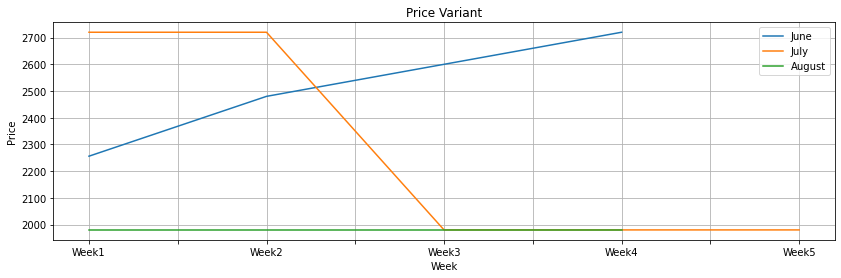

In [60]:
line = df_2018.plot.line()
line.set_xlabel("Week")
line.set_ylabel("Price")
line.set_title("Price Variant")
plt.show()